In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import f, ttest_ind, chi2_contingency

# 1. Datasets

In [2]:
group_data = pd.read_csv('../output/result.csv')

In [3]:
specific_data = pd.read_csv('../final_data.csv')

In [4]:
print(group_data.shape)
group_data.isnull().sum()

(345, 19)


Topic_Year               0
Citation_feature         0
Topic_num                0
Five_Year_Percent        0
Three_Year_Percent       0
Sum_SJR                  0
Avg_SJR                  0
Year                     0
Topic                    0
Growth_Rate             16
Citation_Growth_Rate    16
Year_Growth_Rate        30
Target                   0
Avg_SJR_1               16
Avg_SJR_2               32
Avg_SJR_3               48
Sum_SJR_1               16
Sum_SJR_2               32
Sum_SJR_3               48
dtype: int64

In [5]:
print(specific_data.shape)
specific_data.isnull().sum()

(46169, 13)


Cluster_Topic                       0
PY                                  0
Topic_Year                          0
PT                                  0
PG                                  0
Have_Funding_Agency                 0
Author_count                        0
Funding_agency_count                0
Squeezed_Publisher                  0
Contain_Top_All_authors             0
Contain_Top_All_funding_agencies    0
Count_of_top_funding_agency         0
Contain_Top_PU                      0
dtype: int64

In [6]:
# Merge two datasets into one by key 'Topic_Year'
final_data = group_data.merge(specific_data, how='right', on='Topic_Year')

In [7]:
del group_data
del specific_data

In [8]:
# Filter data after year 2000
final_data = final_data[(final_data.PY >= 2000) & (final_data.PY < 2019)]

In [9]:
# Remove overlapped features
final_data.drop(columns=['PY','Cluster_Topic'], inplace=True)
final_data.isnull().sum()

Topic_Year                             0
Citation_feature                       0
Topic_num                              0
Five_Year_Percent                      0
Three_Year_Percent                     0
Sum_SJR                                0
Avg_SJR                                0
Year                                   0
Topic                                  0
Growth_Rate                          715
Citation_Growth_Rate                 715
Year_Growth_Rate                     715
Target                                 0
Avg_SJR_1                            715
Avg_SJR_2                           1545
Avg_SJR_3                           2519
Sum_SJR_1                            715
Sum_SJR_2                           1545
Sum_SJR_3                           2519
PT                                     0
PG                                     0
Have_Funding_Agency                    0
Author_count                           0
Funding_agency_count                   0
Squeezed_Publish

In [10]:
# Missing data imputation by replacing median values
missing_cols = []
for col in final_data.columns:
    if final_data[col].isnull().sum() != 0:
        missing_cols.append(col)

In [11]:
missing_cols

['Growth_Rate',
 'Citation_Growth_Rate',
 'Year_Growth_Rate',
 'Avg_SJR_1',
 'Avg_SJR_2',
 'Avg_SJR_3',
 'Sum_SJR_1',
 'Sum_SJR_2',
 'Sum_SJR_3']

In [12]:
for missing_col in missing_cols:
    final_data[missing_col].fillna(np.nanmedian(final_data[missing_col]), inplace=True)

In [13]:
final_data.isnull().sum()

Topic_Year                          0
Citation_feature                    0
Topic_num                           0
Five_Year_Percent                   0
Three_Year_Percent                  0
Sum_SJR                             0
Avg_SJR                             0
Year                                0
Topic                               0
Growth_Rate                         0
Citation_Growth_Rate                0
Year_Growth_Rate                    0
Target                              0
Avg_SJR_1                           0
Avg_SJR_2                           0
Avg_SJR_3                           0
Sum_SJR_1                           0
Sum_SJR_2                           0
Sum_SJR_3                           0
PT                                  0
PG                                  0
Have_Funding_Agency                 0
Author_count                        0
Funding_agency_count                0
Squeezed_Publisher                  0
Contain_Top_All_authors             0
Contain_Top_

In [14]:
final_data[final_data.columns[0:11]].head(5)

,Topic_Year,Citation_feature,Topic_num,Five_Year_Percent,Three_Year_Percent,Sum_SJR,Avg_SJR,Year,Topic,Growth_Rate,Citation_Growth_Rate
154,0_2000,0.001865,40.0,0.206186,0.34188,45.009,1.125225,2000.0,0.0,0.081081,-0.445003
155,0_2000,0.001865,40.0,0.206186,0.34188,45.009,1.125225,2000.0,0.0,0.081081,-0.445003
156,0_2000,0.001865,40.0,0.206186,0.34188,45.009,1.125225,2000.0,0.0,0.081081,-0.445003
157,0_2000,0.001865,40.0,0.206186,0.34188,45.009,1.125225,2000.0,0.0,0.081081,-0.445003
158,0_2000,0.001865,40.0,0.206186,0.34188,45.009,1.125225,2000.0,0.0,0.081081,-0.445003


In [15]:
final_data[final_data.columns[11:23]].head(5)

,Year_Growth_Rate,Target,Avg_SJR_1,Avg_SJR_2,Avg_SJR_3,Sum_SJR_1,Sum_SJR_2,Sum_SJR_3,PT,PG,Have_Funding_Agency,Author_count
154,0.100446,0.0,0.9285,0.0,0.0,37.14,0.0,0.0,J,14,0,3
155,0.100446,0.0,0.9285,0.0,0.0,37.14,0.0,0.0,J,2,0,3
156,0.100446,0.0,0.9285,0.0,0.0,37.14,0.0,0.0,J,3,0,1
157,0.100446,0.0,0.9285,0.0,0.0,37.14,0.0,0.0,J,9,1,3
158,0.100446,0.0,0.9285,0.0,0.0,37.14,0.0,0.0,J,11,0,6


In [16]:
final_data[final_data.columns[23:]].head(5)

,Funding_agency_count,Squeezed_Publisher,Contain_Top_All_authors,Contain_Top_All_funding_agencies,Count_of_top_funding_agency,Contain_Top_PU
154,0,ELSEVIER SCIENCE BV,0.0,0.0,0,1.0
155,0,AMER CHEMICAL SOC,0.0,0.0,0,1.0
156,0,Other Publishers,0.0,0.0,0,0.0
157,1,ELSEVIER SCI LTD,0.0,0.0,0,1.0
158,0,Other Publishers,0.0,0.0,0,0.0


# 2. Feature Selection - Visualization & Hypothesis testing
- **2.1 Distribution plots - numerical features VS response**
- **2.2 Relationship between numerical predictors: Correlation Plot**
- **2.3 Distribution plots - categorical features**
- **2.4 Hypothesis testing - two sample t-test for numerical features**
- **2.5 Hypothesis testing - chi-square test for categorical features**
- **2.6 Overall feature selection summary**

## 2.1 Distribution plots - numerical features VS response

In [17]:
# Helper function for inspecting the relationship between numerical features 
# and the response variable.
def num_feature_distribution_plot(col_name, response_name, data):
    plt.figure(figsize = (10, 8))

    # KDE plot of y = 0 
    sb.kdeplot(data.loc[data[response_name] == 0, col_name], label = '0')
    
    # KDE plot of y = 1 
    sb.kdeplot(data.loc[data[response_name] == 1, col_name], label = '1')

    # Labeling
    plt.xlabel(col_name)
    plt.title('Distribution of '+ col_name, fontsize=20)

/Users/wuchenhong/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


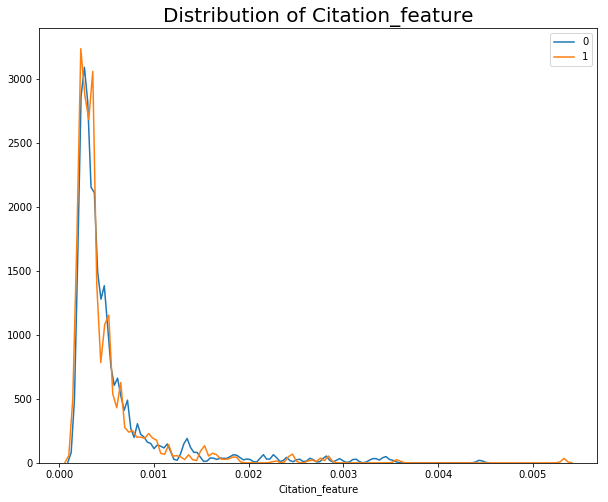

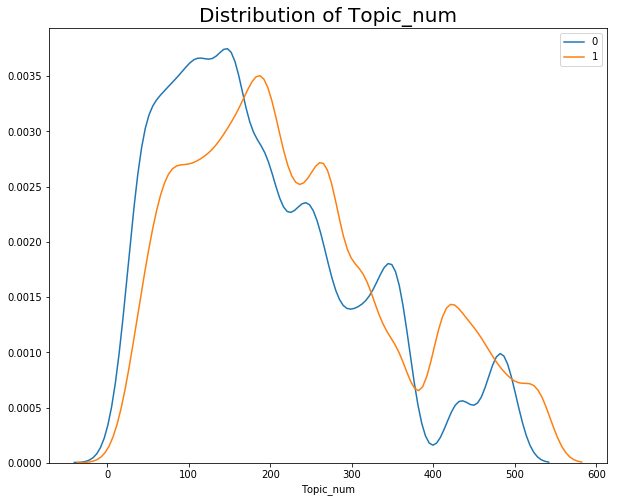

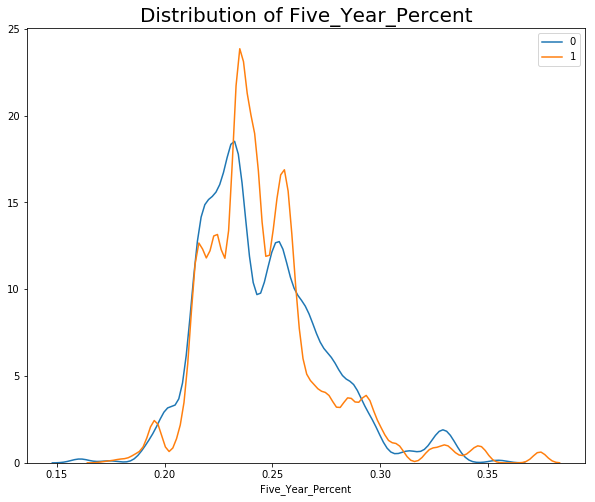

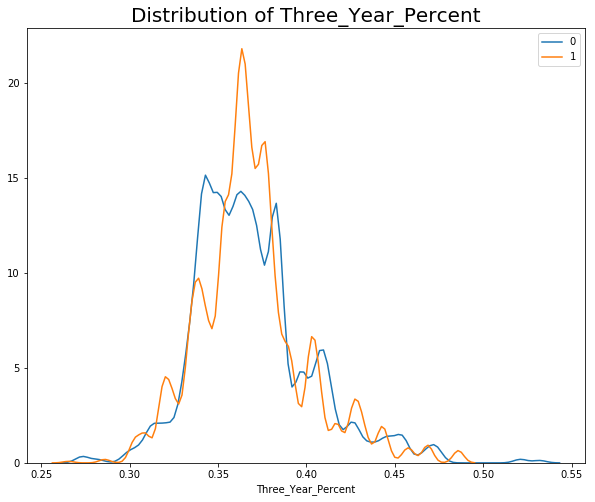

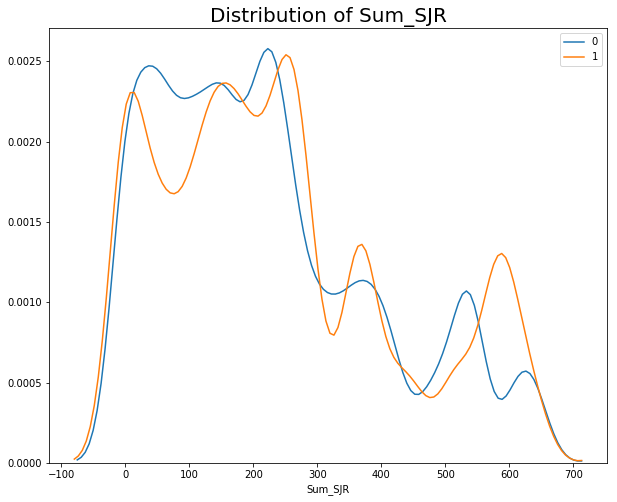

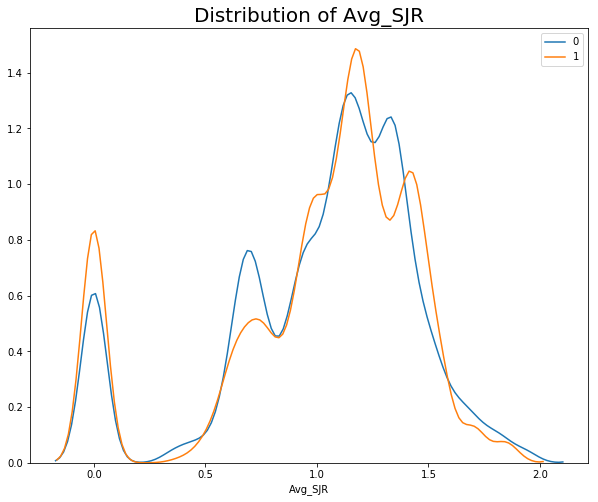

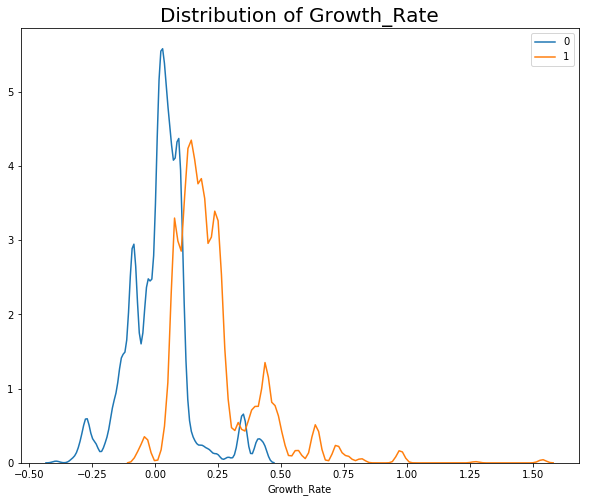

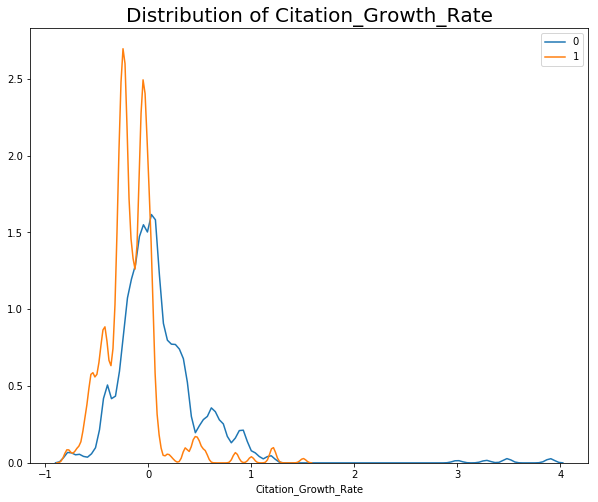

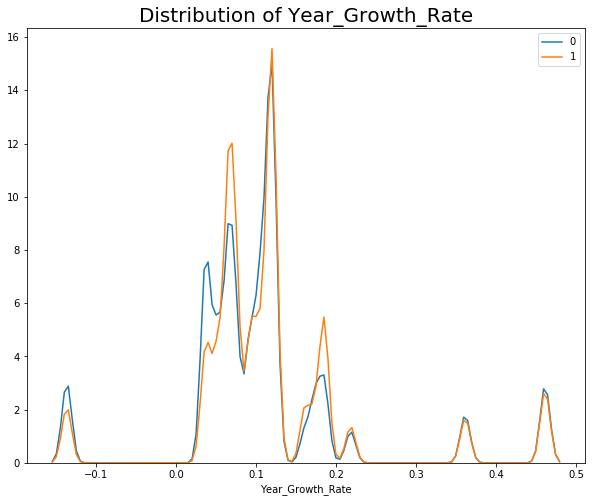

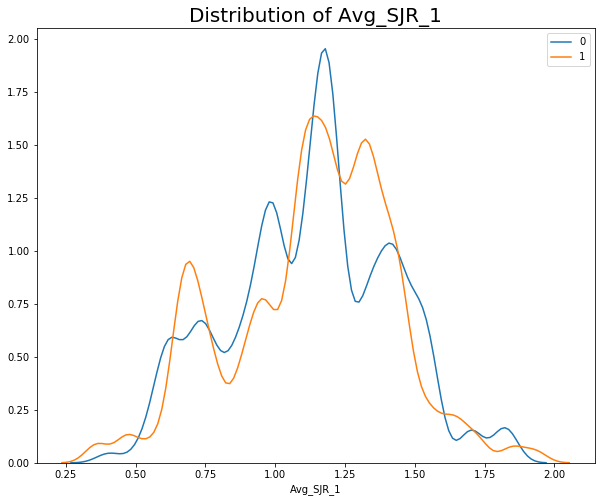

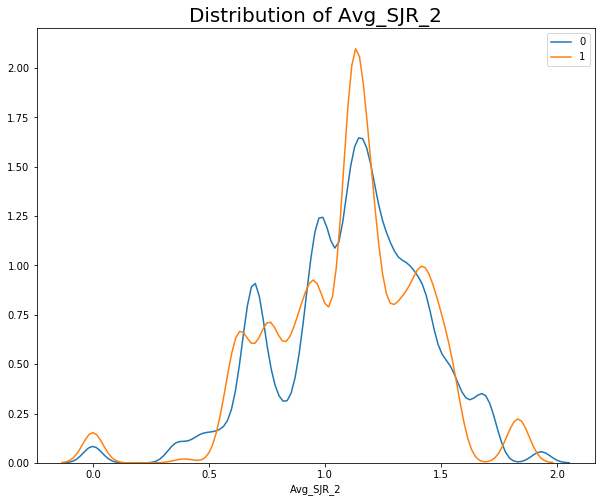

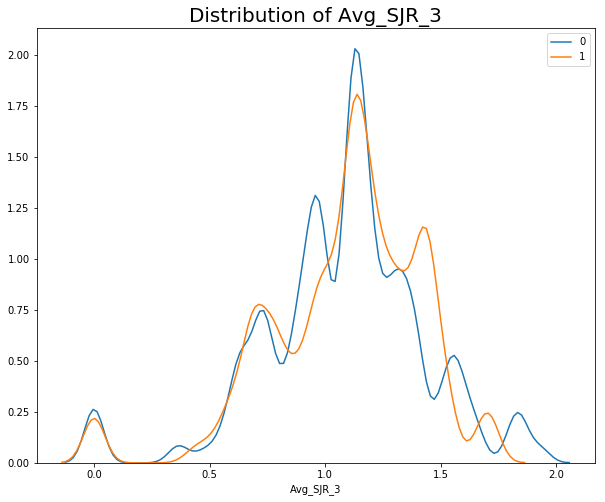

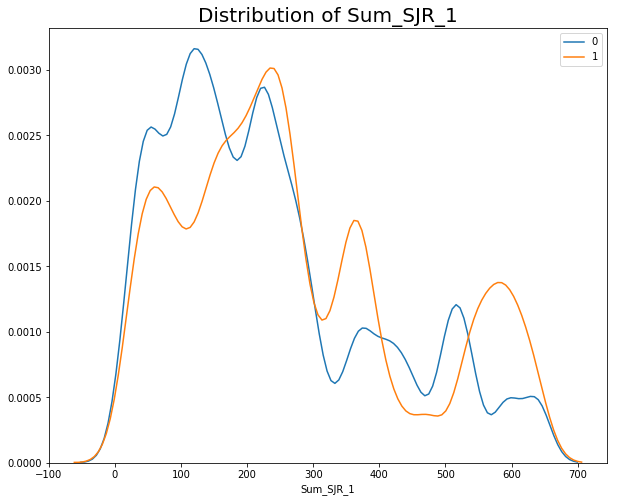

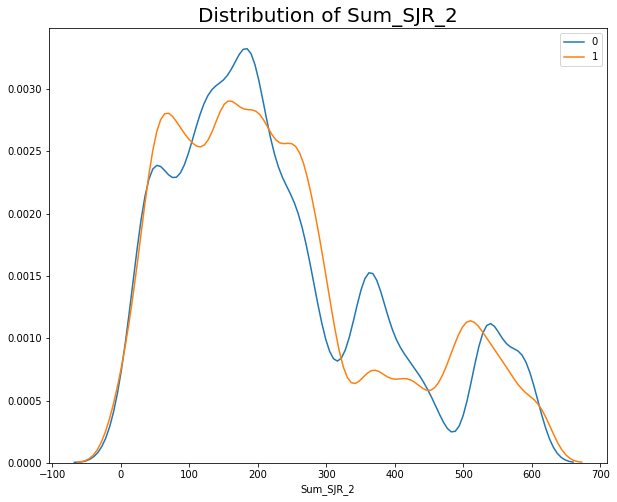

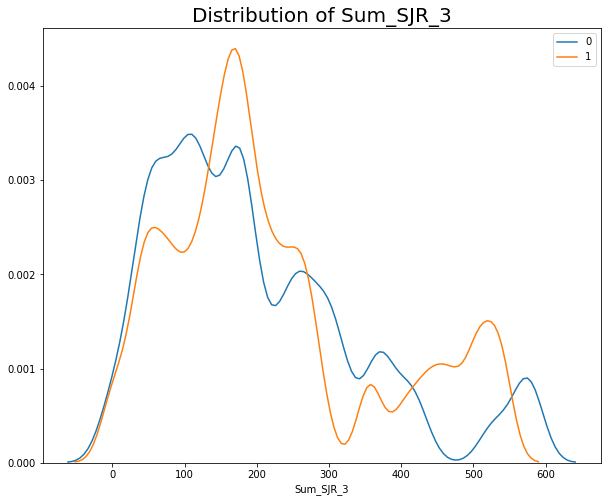

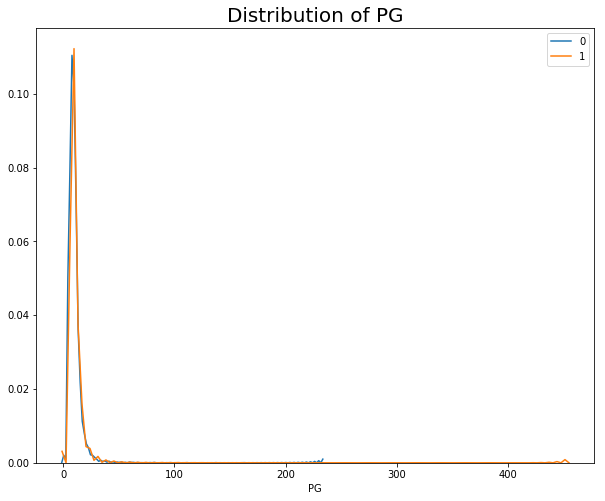

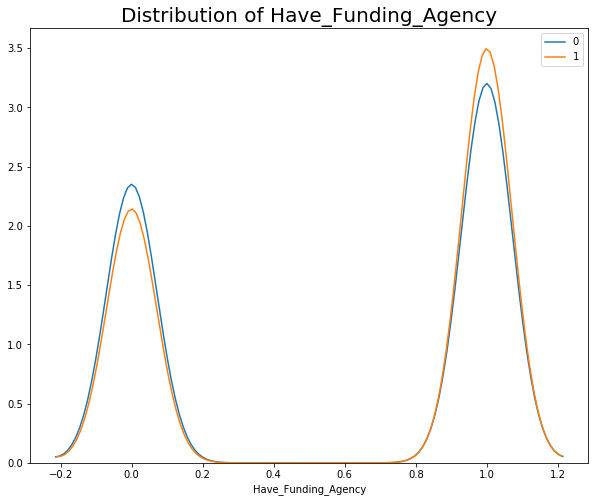

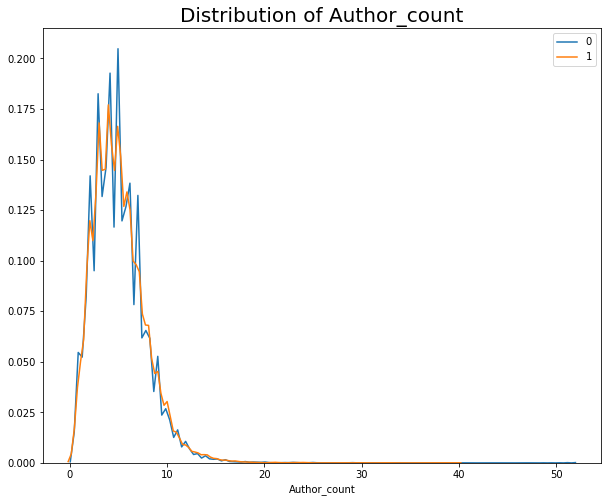

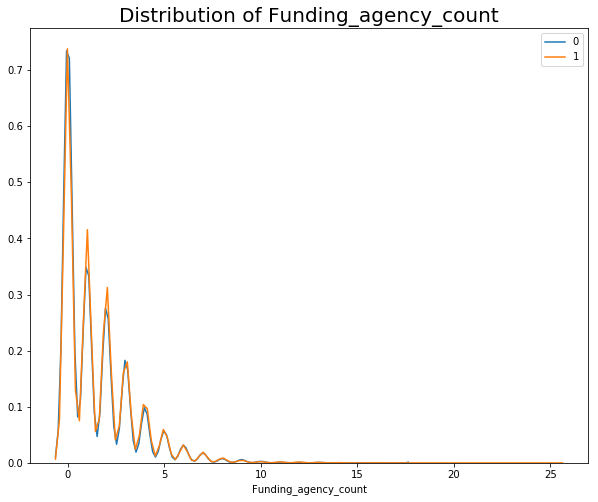

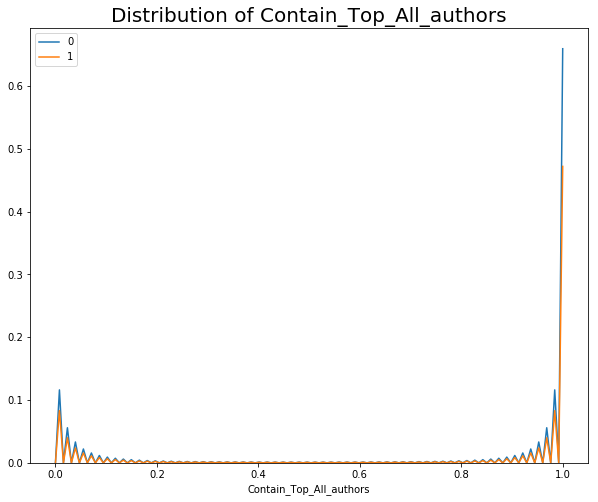

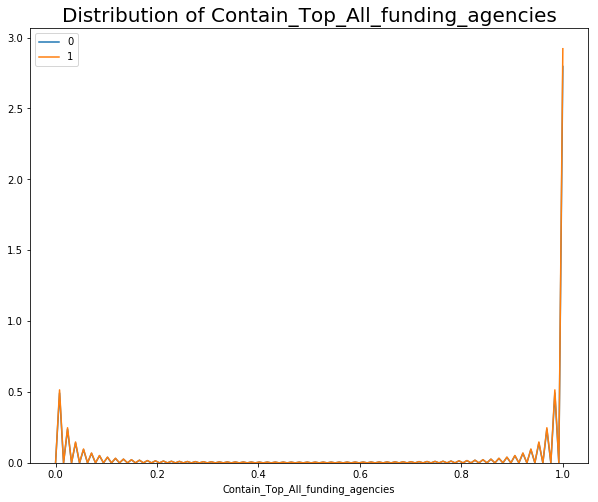

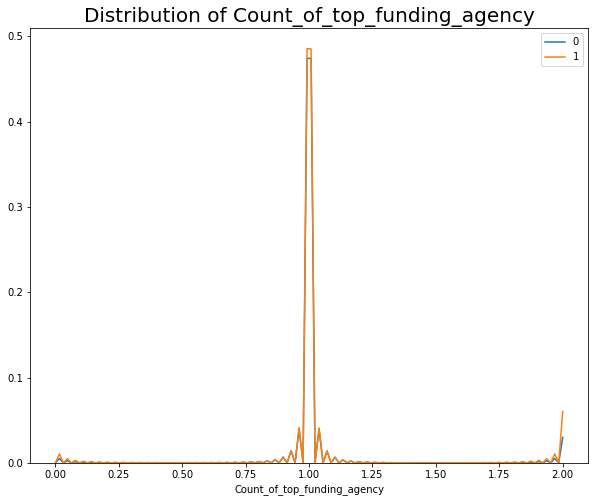

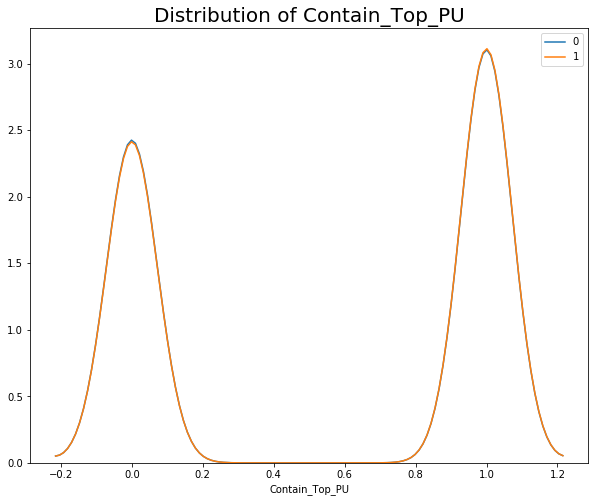

In [18]:
# 'smoothness_se' and 'symmetry_se' might not be good predictors for distinguishing 
# response variables since two lines are overlapped to each other.
for col in final_data.columns:
    if (final_data[col].dtype != 'object') & (col not in ['Target','Year','Topic']):
        num_feature_distribution_plot(col_name=col, response_name='Target', data=final_data)

## 2.2 Relationship between numerical predictors: Correlation Plot

In [19]:
num_col_names = []
for col in final_data.columns:
    if (final_data[col].dtype != 'object'):
        num_col_names.append(col)
        
num_col_names.remove('Year')
num_col_names.remove('Topic')

correlation_matrix = final_data[num_col_names].corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

In [20]:
# The correlation matrix shape is 24 x 24
correlation_matrix

,Citation_feature,Topic_num,Five_Year_Percent,Three_Year_Percent,Sum_SJR,Avg_SJR,Growth_Rate,Citation_Growth_Rate,Year_Growth_Rate,Target,...,Sum_SJR_2,Sum_SJR_3,PG,Have_Funding_Agency,Author_count,Funding_agency_count,Contain_Top_All_authors,Contain_Top_All_funding_agencies,Count_of_top_funding_agency,Contain_Top_PU
Citation_feature,1.000000,-0.450608,0.499654,0.450850,-0.267701,0.000766,0.054407,0.326642,0.109183,-0.072469,...,-0.345108,-0.332958,-0.056316,-0.359743,-0.121971,-0.271126,0.019246,-0.026413,-0.026960,-0.025731
Topic_num,-0.450608,1.000000,-0.348214,-0.299205,0.592163,-0.096854,-0.094283,-0.132016,-0.222140,0.155911,...,0.903325,0.894375,0.141019,0.387348,0.170942,0.319366,-0.025578,0.028988,0.029831,0.053320
Five_Year_Percent,0.499654,-0.348214,1.000000,0.924159,-0.052403,0.134787,0.105776,0.161832,0.103797,0.013966,...,-0.319413,-0.322232,-0.067592,-0.255438,-0.090470,-0.205797,0.010249,-0.021476,-0.022378,-0.000708
Three_Year_Percent,0.450850,-0.299205,0.924159,1.000000,-0.051414,0.089470,0.072738,0.209588,0.079916,-0.003973,...,-0.258665,-0.232265,-0.049764,-0.206164,-0.068498,-0.163287,0.011267,-0.020333,-0.020547,0.003557
Sum_SJR,-0.267701,0.592163,-0.052403,-0.051414,1.000000,0.653992,-0.066205,-0.061714,-0.143027,0.045907,...,0.608134,0.576523,0.059852,0.289595,0.092837,0.233646,-0.011412,0.031518,0.029388,0.050036
Avg_SJR,0.000766,-0.096854,0.134787,0.089470,0.653992,1.000000,0.013099,0.019273,0.006440,-0.020650,...,-0.002856,-0.048977,-0.036599,0.075152,-0.027990,0.049621,0.005104,0.019004,0.015162,0.020406
Growth_Rate,0.054407,-0.094283,0.105776,0.072738,-0.066205,0.013099,1.000000,-0.479763,0.593226,0.585303,...,-0.222895,-0.118797,-0.037199,-0.106637,-0.041725,-0.086242,0.003046,-0.013256,-0.013526,-0.017081
Citation_Growth_Rate,0.326642,-0.132016,0.161832,0.209588,-0.061714,0.019273,-0.479763,1.000000,-0.204023,-0.342006,...,-0.052766,-0.109415,-0.004958,-0.053488,-0.017482,-0.040047,0.005796,-0.006516,-0.006606,0.001799
Year_Growth_Rate,0.109183,-0.222140,0.103797,0.079916,-0.143027,0.006440,0.593226,-0.204023,1.000000,0.033698,...,-0.296776,-0.215632,-0.058127,-0.163181,-0.060875,-0.133421,0.008631,-0.017366,-0.018394,-0.028688
Target,-0.072469,0.155911,0.013966,-0.003973,0.045907,-0.020650,0.585303,-0.342006,0.033698,1.000000,...,-0.003468,0.068318,0.019683,0.044258,0.012461,0.030159,-0.008572,0.002559,0.003630,0.001901


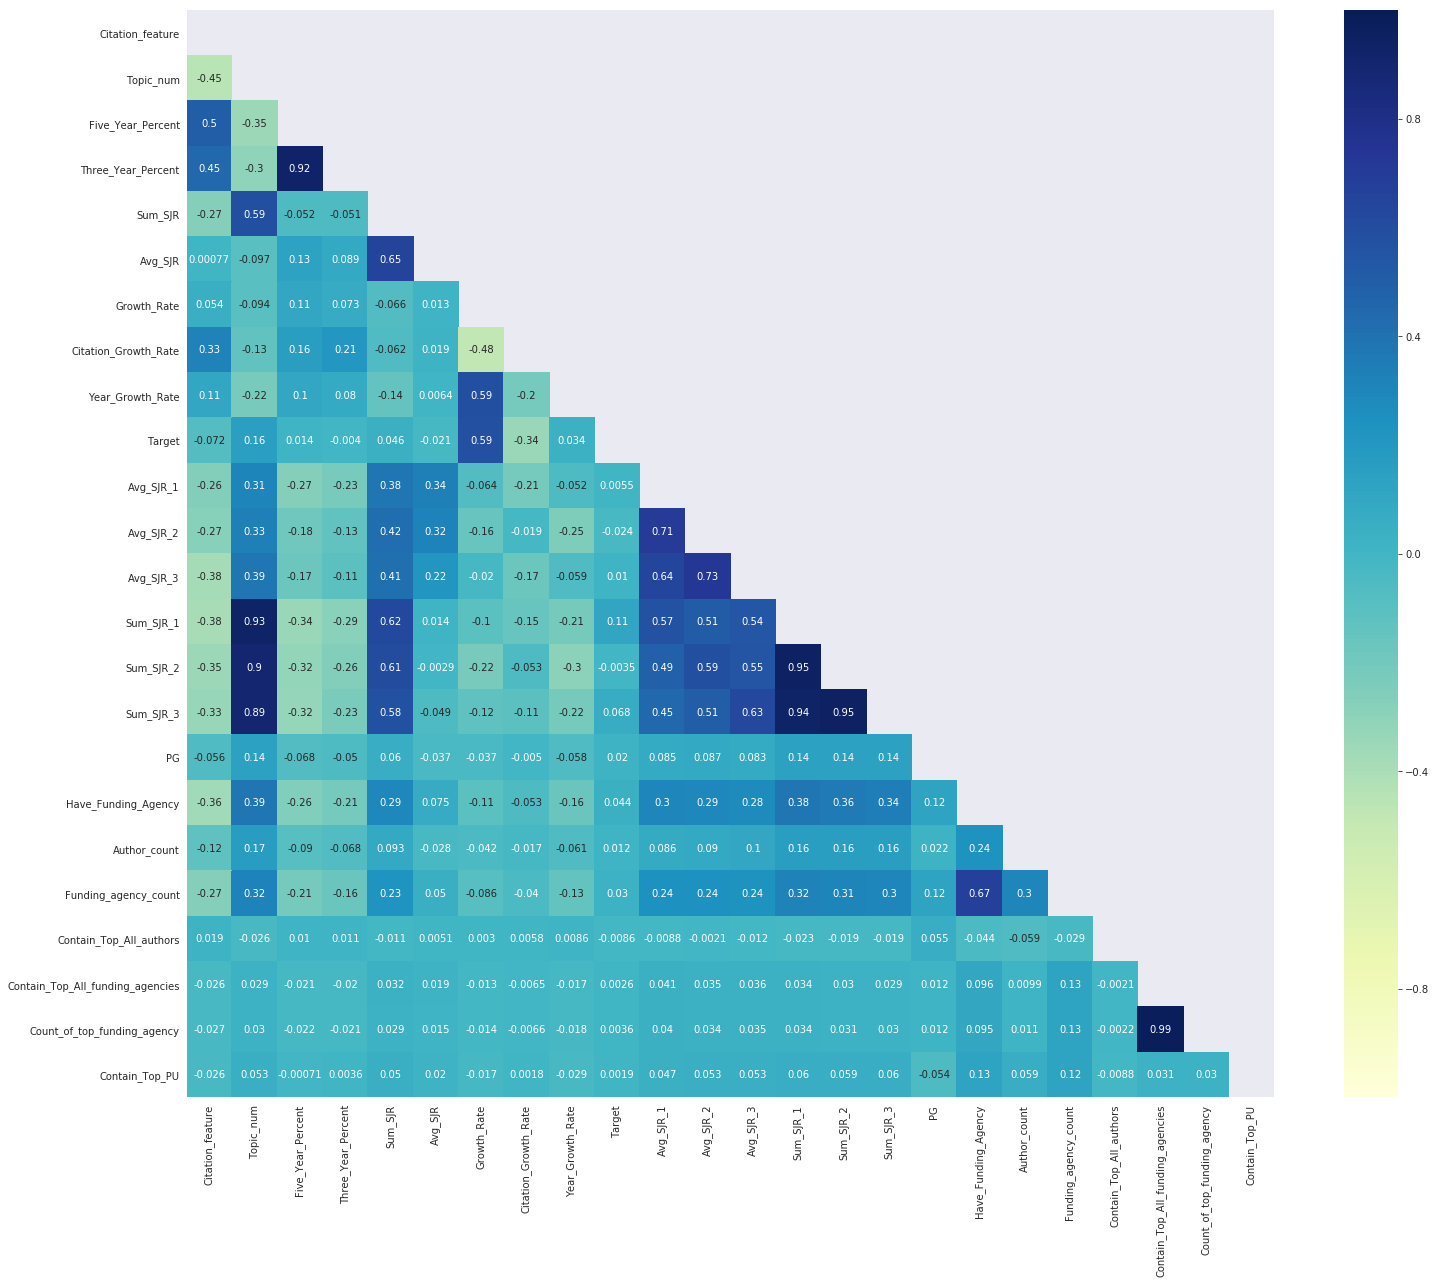

In [21]:
# Correlation plot helps me to inspect the relationship among numerical features.
# There might be a multicollinearity issue existed!
# For instance, perimeter_mean and radius_mean have a perfect positive correlation!
with sb.axes_style("darkgrid"):
    fig = plt.figure(figsize=(25,20))
    ax = sb.heatmap(correlation_matrix, mask = mask, 
                    vmin = -1, vmax = 1, square = True,
                    annot = True, cmap = "YlGnBu")

## 2.3 Distribution plots - categorical features

In [22]:
# Helper function for inspecting the relationship between categorical features 
# and the response variable.
def cate_feature_distribution_plot(col_name, response_name, data):
    pd.crosstab(data[col_name], data[response_name]).plot(kind='bar')
    plt.title('Distribution of '+ col_name, fontsize=20)
    plt.xlabel('')
    plt.show()

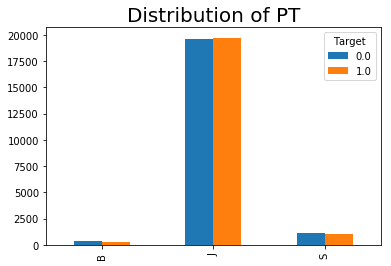

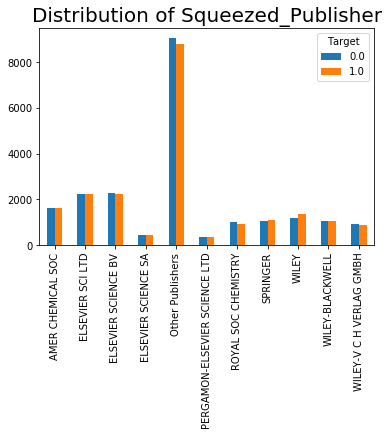

In [23]:
for col in final_data.columns:
    if (final_data[col].dtype == 'object') & (col != 'Topic_Year'):
        cate_feature_distribution_plot(col_name=col, response_name='Target', data=final_data)

## 2.4 Hypothesis testing - two sample t-test for numerical features

In [24]:
# Helper function for performing an f-test to compare two sample variances.
def f_test_two_p_variance(var1, var2, n1, n2, alpha_level):
    '''
    Perform the F-test for comparing variances between two samples.
    Outputs: F ratio, p-value, and the confidence interval given an alpha level.
    
    var1: the variance of the population 1
    var2: the variance of the population 2
    n1: sample size of the population 1
    n2: sample size of the population 2
    alpha_level: can be either 0.1, 0.05, or 0.1
    '''
    # F test statistic
    F_ratio = var1 / var2
    
    # p-value (two-sided test: the interest is to compare whether two variances are equal)
    p_value = min(f.cdf(F_ratio, n1-1, n2-1), 1 - f.cdf(F_ratio, n1-1, n2-1))
    p_value = p_value*2

    # 95% C.I.
    upper = 1 / (f.ppf(alpha_level/2, n1-1, n2-1)) * F_ratio
    lower = 1 / (f.ppf(1 - (alpha_level/2), n1-1, n2-1)) * F_ratio
    
    return F_ratio, p_value, (lower, upper)

In [25]:
# Loop into numerical columns.
unequal_var = []
equal_var = []
for num_col in num_col_names:
    if num_col != 'Target':
        f_results = f_test_two_p_variance(var1=final_data[final_data.Target == 0][num_col].var(), 
                                          var2=final_data[final_data.Target == 1][num_col].var(), 
                                          n1=final_data[final_data.Target == 0][num_col].count(), 
                                          n2=final_data[final_data.Target == 1][num_col].count(), 
                                          alpha_level=0.05)
        print('Column name: {}.'.format(num_col))
        print('F ratio: {}.'.format(f_results[0]))
        print('p-value: {}.'.format(f_results[1]))
        print('95 C.I. {}.'.format(f_results[2]))
        if f_results[1] <= 0.05:
            print('Decision: reject H0, two variances are unequal.')
            unequal_var.append(num_col)
        else: 
            print('Decision: do not reject H0, two variances are equal.')
            equal_var.append(num_col)
        print('----------------------------------------------------')

Column name: Citation_feature.
F ratio: 1.425739185793084.
p-value: 2.220446049250313e-16.
95 C.I. (1.3878000852700494, 1.4647140437072454).
Decision: reject H0, two variances are unequal.
----------------------------------------------------
Column name: Topic_num.
F ratio: 0.8507676308951359.
p-value: 7.990037603734386e-32.
95 C.I. (0.8281285963564872, 0.8740247229793805).
Decision: reject H0, two variances are unequal.
----------------------------------------------------
Column name: Five_Year_Percent.
F ratio: 1.022940502979629.
p-value: 0.09929724579356014.
95 C.I. (0.9957199264826456, 1.050904215526461).
Decision: do not reject H0, two variances are equal.
----------------------------------------------------
Column name: Three_Year_Percent.
F ratio: 1.1417042323527957.
p-value: 2.220446049250313e-16.
95 C.I. (1.1113233379575056, 1.1729145411381257).
Decision: reject H0, two variances are unequal.
----------------------------------------------------
Column name: Sum_SJR.
F ratio: 0

In [26]:
# Perform two sample t-test to see whether they have 'different' means.
# If they are different to each other in the aspect of mean given a predictor, 
# then it might indicate this predictor has some prediction power 
# on the response variable

# Collecting results.
t_test_results = np.array([])
t_test_p_values = np.array([])
num_col_names = np.array([])

# Loop into numerical columns - unequal variance case.
for num_col in unequal_var:
    t_test_results = np.append(t_test_results,
                               (ttest_ind(a=final_data[final_data.Target == 0][num_col], 
                                          b=final_data[final_data.Target == 1][num_col], 
                                          equal_var=False))[0])
    t_test_p_value = ttest_ind(a=final_data[final_data.Target == 0][num_col], 
                               b=final_data[final_data.Target == 1][num_col], 
                               equal_var=False)[1]
    t_test_p_values = np.append(t_test_p_values, t_test_p_value)
    num_col_names = np.append(num_col_names, num_col)
    # Decision (reject or not reject H0)
    if t_test_p_value <= 0.05:
        print('Column name: {}.'.format(num_col))
        print('Decision: reject H0, two means are unequal.')
        print('p-value: {}.'.format(t_test_p_value))
    else:
        print('Column name: {}.'.format(num_col))
        print('Decision: do not reject H0, two means are equal.')
        print('p-value: {}.'.format(t_test_p_value))
    print('-------------------------------------------')

# Loop into numerical columns - equal variance case.
for num_col in equal_var:
    t_test_results = np.append(t_test_results,
                               (ttest_ind(a=final_data[final_data.Target == 0][num_col], 
                                          b=final_data[final_data.Target == 1][num_col], 
                                          equal_var=True))[0])
    t_test_p_value = ttest_ind(a=final_data[final_data.Target == 0][num_col], 
                               b=final_data[final_data.Target == 1][num_col], 
                               equal_var=True)[1]
    t_test_p_values = np.append(t_test_p_values, t_test_p_value)
    num_col_names = np.append(num_col_names, num_col)
    # Decision (reject or not reject H0)
    if t_test_p_value <= 0.05:
        print('Column name: {}.'.format(num_col))
        print('Decision: reject H0, two means are unequal.')
        print('p-value: {}.'.format(t_test_p_value))
    else:
        print('Column name: {}.'.format(num_col))
        print('Decision: do not reject H0, two means are equal.')
        print('p-value: {}.'.format(t_test_p_value))
    print('-------------------------------------------')

Column name: Citation_feature.
Decision: reject H0, two means are unequal.
p-value: 2.368546753547036e-50.
-------------------------------------------
Column name: Topic_num.
Decision: reject H0, two means are unequal.
p-value: 5.369355433215051e-228.
-------------------------------------------
Column name: Three_Year_Percent.
Decision: do not reject H0, two means are equal.
p-value: 0.4140619168195383.
-------------------------------------------
Column name: Sum_SJR.
Decision: reject H0, two means are unequal.
p-value: 3.735376302685302e-21.
-------------------------------------------
Column name: Avg_SJR.
Decision: reject H0, two means are unequal.
p-value: 2.18957653614294e-05.
-------------------------------------------
Column name: Growth_Rate.
Decision: reject H0, two means are unequal.
p-value: 0.0.
-------------------------------------------
Column name: Citation_Growth_Rate.
Decision: reject H0, two means are unequal.
p-value: 0.0.
-------------------------------------------
C

In [27]:
# Absolute t-test statistics.
abs(t_test_results)[abs(t_test_results).argsort()]

array([  0.39080904,   0.5260716 ,   0.71290076,   0.74614661,
         0.81677452,   1.13006442,   1.76284077,   2.11674444,
         2.56161129,   2.87105381,   4.04626111,   4.24510577,
         4.9699091 ,   6.20184125,   6.9317233 ,   9.10678276,
         9.4448428 ,  14.07456899,  14.94240238,  22.7593068 ,
        32.43781127,  74.91037395, 148.26161905])

In [28]:
# Column names: From the least to the most important numerical feature.
num_col_names[abs(t_test_results).argsort()]

array(['Contain_Top_PU', 'Contain_Top_All_funding_agencies', 'Sum_SJR_2',
       'Count_of_top_funding_agency', 'Three_Year_Percent', 'Avg_SJR_1',
       'Contain_Top_All_authors', 'Avg_SJR_3', 'Author_count',
       'Five_Year_Percent', 'PG', 'Avg_SJR', 'Avg_SJR_2',
       'Funding_agency_count', 'Year_Growth_Rate', 'Have_Funding_Agency',
       'Sum_SJR', 'Sum_SJR_3', 'Citation_feature', 'Sum_SJR_1',
       'Topic_num', 'Citation_Growth_Rate', 'Growth_Rate'], dtype='<U32')

## 2.5 Hypothesis testing - chi-square test for categorical features

In [29]:
for col in final_data.columns:
    if final_data[col].dtype == 'object':
        print(col)

Topic_Year
PT
Squeezed_Publisher


In [30]:
# Collecting results.
chi_square_test_results = np.array([])
cate_col_names = np.array([])

# Loop into categorical features.
for col in final_data.columns:
    if (final_data[col].dtype == 'object') & (col != 'Topic_Year'):
        chi_square_test_results = np.append(chi_square_test_results, 
                                            chi2_contingency(pd.crosstab(final_data[col], final_data['Target']).values)[0])
        chi_square_test_p = chi2_contingency(pd.crosstab(final_data[col], final_data['Target']).values)[1]
        cate_col_names = np.append(cate_col_names, col)
        
        if chi_square_test_p <= 0.05:
            print('Column name: {}.'.format(col))
            print('Decision: reject H0, {} and {} are not independent to each other.'.
                 format(col, 'Target (trend or not trend)'))
            print('p-value: {}.'.format(chi_square_test_p))
        else:
            print('Column name: {}.'.format(col)) 
            print('Decision: do not reject H0, {} and {} are independent to each other.'.
                  format(col, 'Target (trend or not trend)'))
            print('p-value: {}.'.format(chi_square_test_p))
        print('---------------------------------------------------------------------------------------------')

Column name: PT.
Decision: reject H0, PT and Target (trend or not trend) are not independent to each other.
p-value: 0.0017260778344512257.
---------------------------------------------------------------------------------------------
Column name: Squeezed_Publisher.
Decision: reject H0, Squeezed_Publisher and Target (trend or not trend) are not independent to each other.
p-value: 0.03673993704239278.
---------------------------------------------------------------------------------------------


## 2.6 Overall feature selection summary

#### Numerical Features
- P-value larger than 0.05

| Column name | p-value |
| -- | -- |
| Contain_Top_PU| 0.9447
| Contain_Top_All_funding_agencies | 0.5988
| Sum_SJR_2 | 0.4759
| Count_of_top_funding_agency | 0.4556
| Three_Year_Percent | 0.4141
| Avg_SJR_1 | 0.2585
| **Contain_Top_All_authors** | **0.0779 (Close to 0.05)**

- P-value less than 0.05

| Column name | Rank | p-value 
| -- | -- | -- 
| Avg_SJR_3 | 16 | **0.03428 (Close to 0.05)**
| Author_count | 15
| Five_Year_Percent | 14
| PG | 13
| Avg_SJR | 12
| Avg_SJR_2 | 11
| Funding_agency_count | 10
| Year_Growth_Rate | 9
| Have_Funding_Agency | 8
| Sum_SJR | 7
| Sum_SJR_3 | 6
| Citation_feature | 5
| Sum_SJR_1 | 4
| Topic_num | 3 
| Citation_Growth_Rate | 2
| **Growth_Rate** | **1**

#### Categorical Features
- P-value less than 0.05

| Column name | p-value |
| -- | -- |
| PT | 0.0017
| **Contain_Top_All_funding_agencies** | **0.03674 (Close to 0.05)**